## Project10 - Bank term deposit prediction

## Citation

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

__Objective:__ Term deposits are major revenue sources for banks. The project is related to direct marketing campaigns in banks, where we will predict the probability that a customer contacted by the phone banking team will subscribe for a term deposit. The project will also indicate the key variables that impact conversion.

## About the dataset
The source data consists of the following are the variables provided for 41188 customers:

<br>__age__: Age of customer
<br>__job__: type of job 
<br>__marital__: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>__education__: Customer education level
<br>__default__: has credit in default?
<br>__housing__: has housing loan?
<br>__loan__: has personal loan?


__Related with the last contact of the current campaign__:
<br>__contact__: contact communication type
<br>__month__: last contact month of year
<br>__day_of_week__: last contact day of the week

__Other attributes__:
<br>__campaign__: number of contacts performed during this campaign and for this client 
<br>__pdays__: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
<br>__previous__: number of contacts performed before this campaign and for this client
<br>__poutcome__: outcome of the previous marketing campaign

__Social and economic context attributes__:
<br>__emp.var.rate__: employment variation rate - quarterly indicator
<br>__cons.price.idx__: consumer price index - monthly indicator
<br>__cons.conf.idx__: consumer confidence index - monthly indicator 
<br>__euribor3m__: euribor 3 month rate - daily indicator
<br>__nr.employed__: number of employees - quarterly indicator

__Output variable (desired target)__:
<br>__y__: has the client subscribed a term deposit? (binary: 'yes','no')

## Project Instructions
1. Perform the required data pre-processing to treat for missing values and outliers
2. Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3. Divide the given data into train and test sets
5. Predict customer propensity to subsribe to a term deposit by building classification models
7. Interpret how each of the X variables influence the conversion propensity
8. Evaluate the model performance measures and choose the most optimum model
9. Enlist your key findings based on the most optimum model and the respective feature importance

In [1]:
# importing the required libraries

# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# For avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
bankdata = pd.read_csv('bank.csv')
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
nrow, ncol = bankdata.shape
(nrow,ncol)

(41188, 20)

In [5]:
bankdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
# balance of the data
bankdata['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

# Basic EDA


In [7]:
# Checking out the null values
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# finding out the sum of all null values
bankdata.isnull().sum().sum()

0

In [9]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [11]:
# rows with missing values represented as'?'.
df_1 = bankdata[bankdata.y == '?']
df_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [12]:
# select all categorical variables
df_categorical = bankdata.select_dtypes(include=['object'])
df_categorical.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no


In [13]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
bankdata['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [15]:
!pip install missingno

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
spyder 3.3.2 requires pyqt5<5.10; python_version >= "3", which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
import missingno as msg

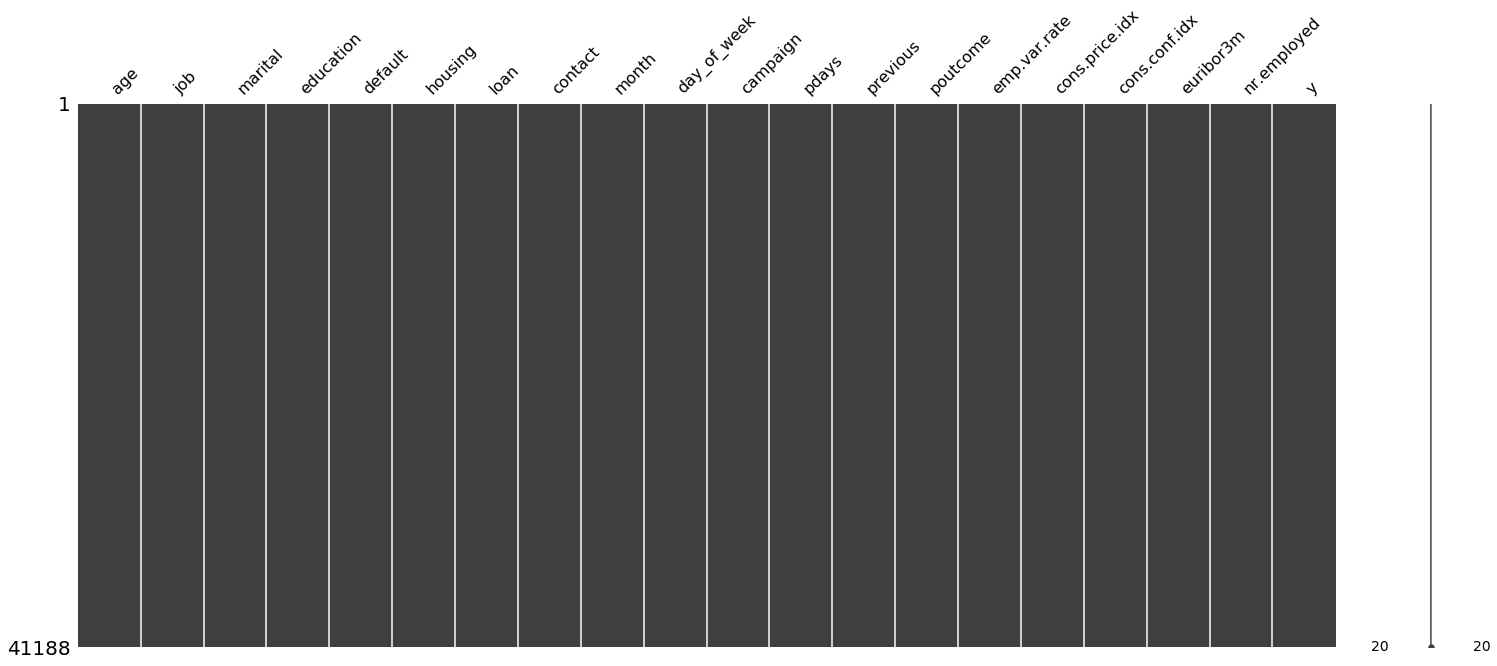

In [17]:
msg.matrix(bankdata)
plt.show()

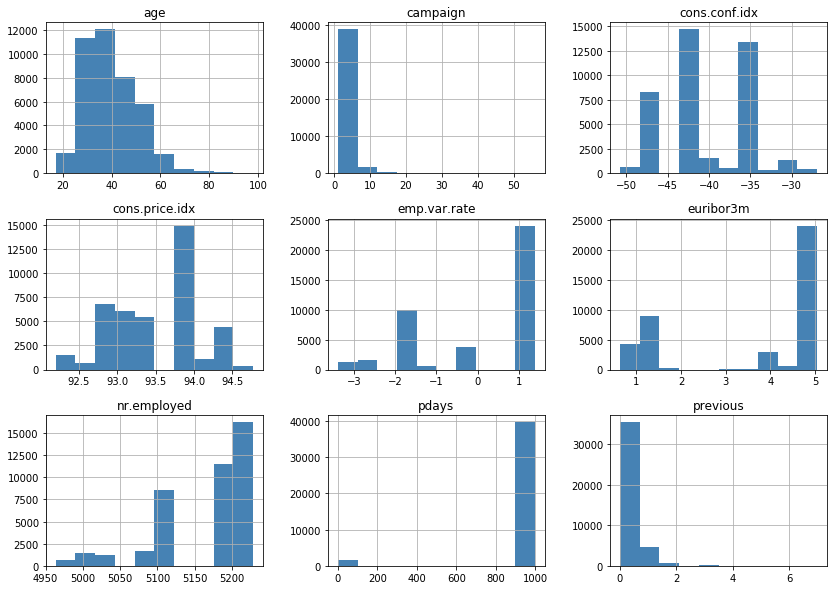

In [18]:
# Let's see how the numeric data is distributed

bankdata.hist(bins=10, figsize=(14,10), color='steelblue')
plt.show()

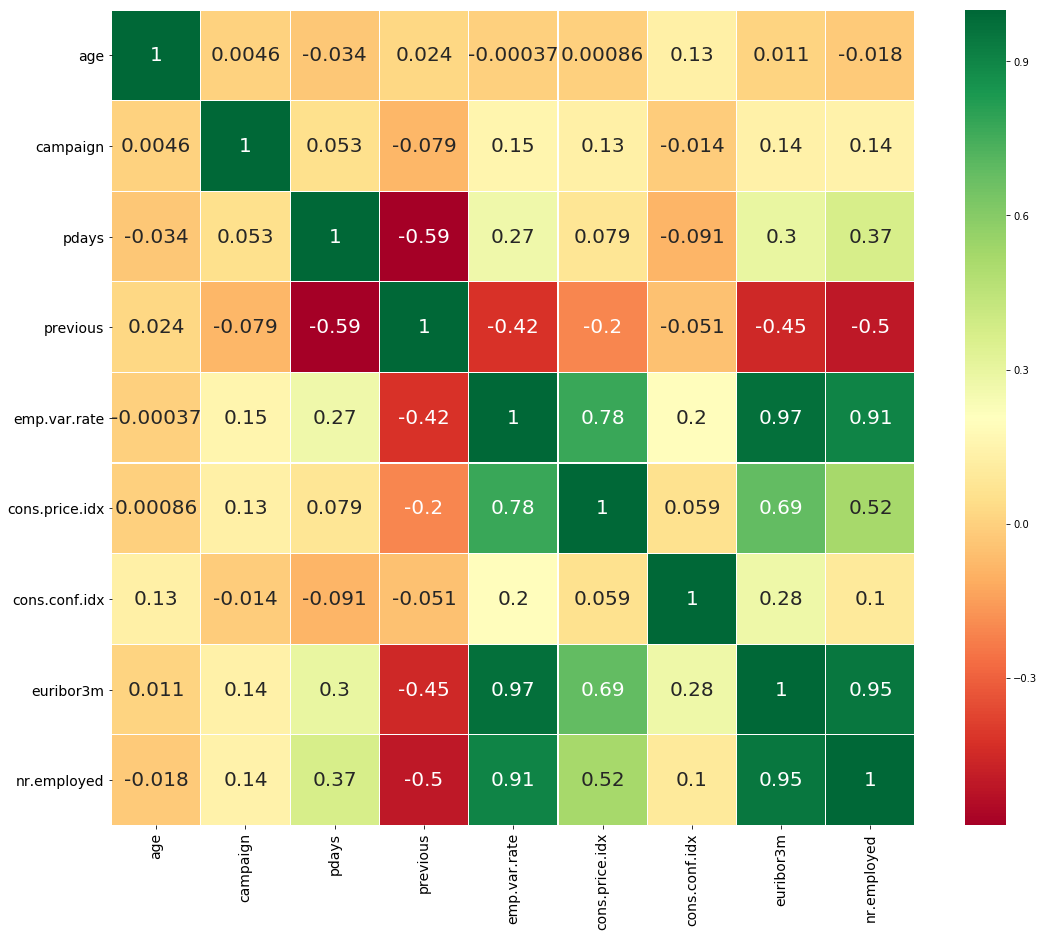

In [19]:
corr = bankdata.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## visualizing the frequency of the distribution of each variable

In [20]:
df_categorical['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [21]:
df_categorical['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [22]:
df_categorical['job'].nunique()

12

# Countplot

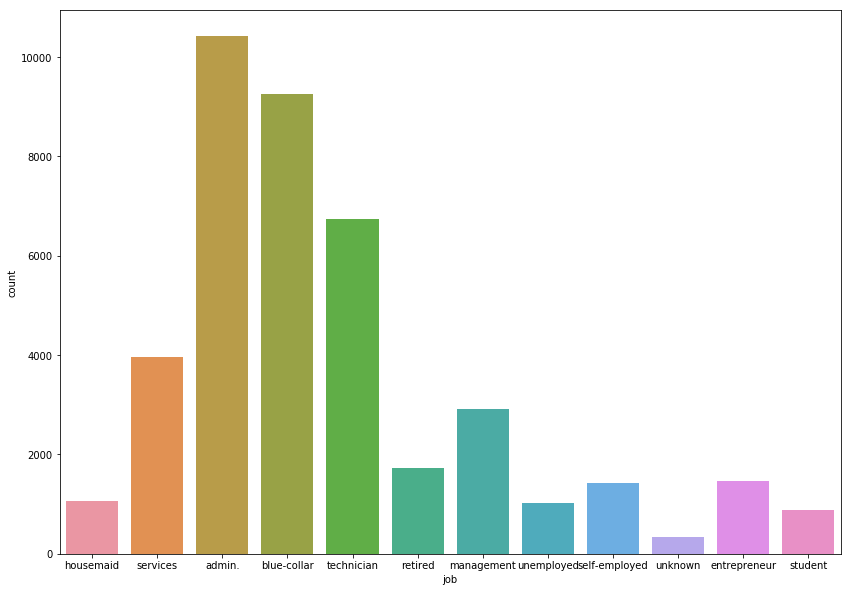

In [23]:
plt.subplots(figsize=(14,10))
sns.countplot(data = df_categorical, x = 'job')
plt.show()

## The above graph tells us that admin and blue-collar professionals have subscribed a lot for the compaign and they are the targeted people for the marketing compaign.

In [24]:
df_categorical['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

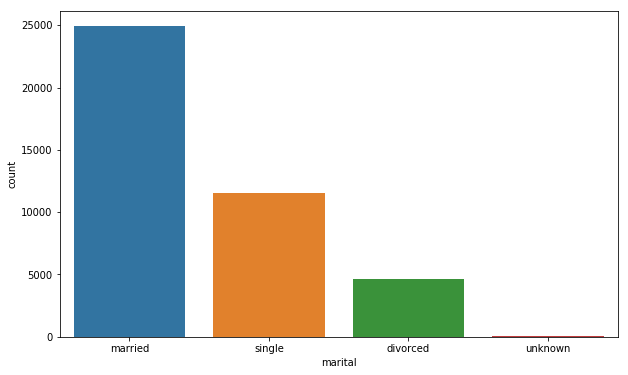

In [25]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'marital')
plt.show()

## So, Mostly the married people would be the most appropriate audience rather than single and divorced.

In [26]:
df_categorical['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

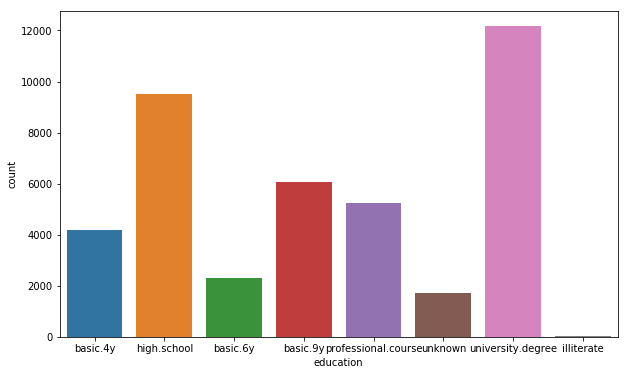

In [27]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'education')
plt.show()

## People who have university degree and high school qualification are the targeted audience.

In [28]:
df_categorical['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [29]:
df_categorical['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

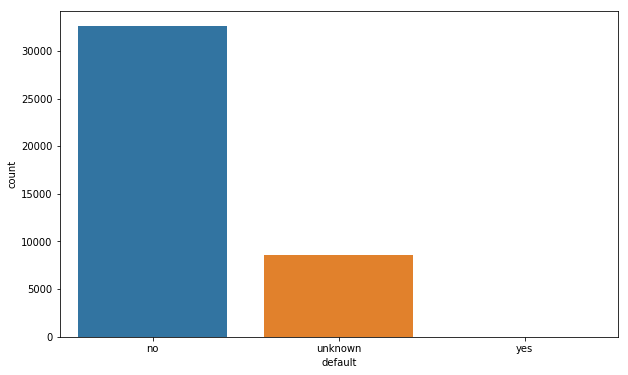

In [30]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'default')
plt.show()

## So, people dont have credit in default  dint subscribe but only three people did it.

In [31]:
df_categorical['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [32]:
df_categorical['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

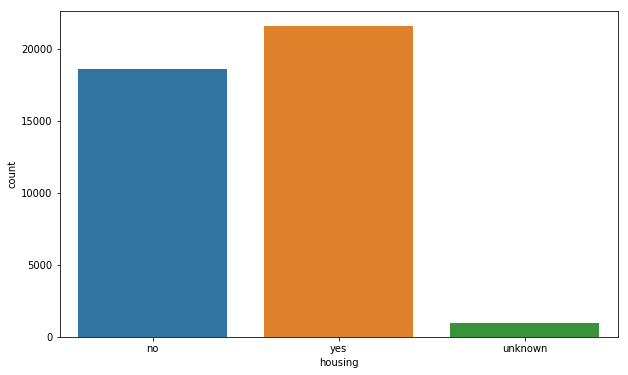

In [33]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'housing')
plt.show()

The most people have taken the housing loan than people who dint.

In [34]:
df_categorical['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [35]:
df_categorical['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

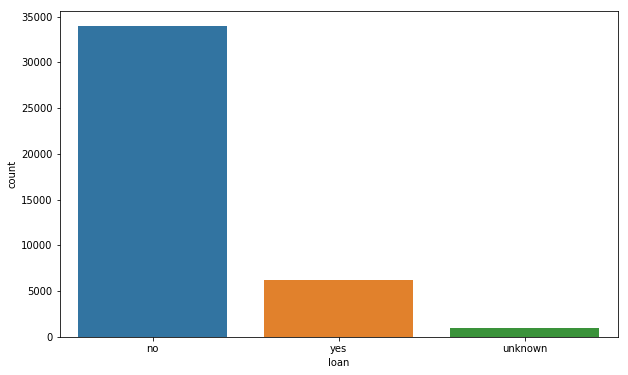

In [36]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'loan')
plt.show()

The most people have not taken the personal loan, but some people in less count.

In [37]:
df_categorical['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [38]:
df_categorical['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

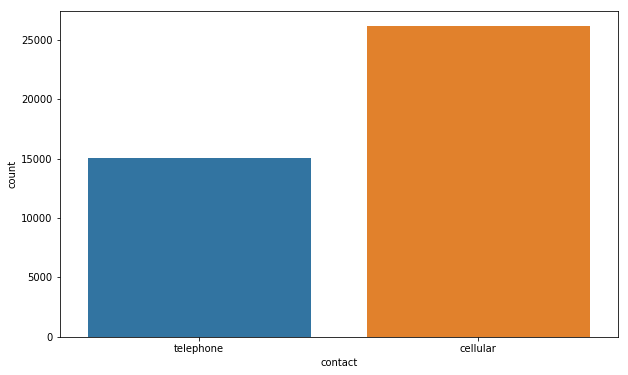

In [39]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'contact')
plt.show()

So, the most people have been contacted by mobile phones than telephones for the enquiry.

In [40]:
df_categorical['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [41]:
df_categorical['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

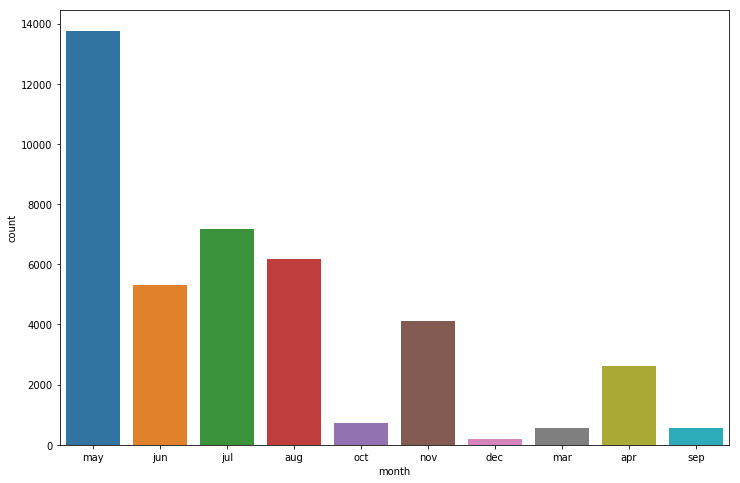

In [42]:
plt.subplots(figsize=(12,8))
sns.countplot(data = df_categorical, x = 'month')
plt.show()

## Most people have subscribed for the compaign in the month of MAY and JULY.

In [43]:
df_categorical['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [44]:
df_categorical['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

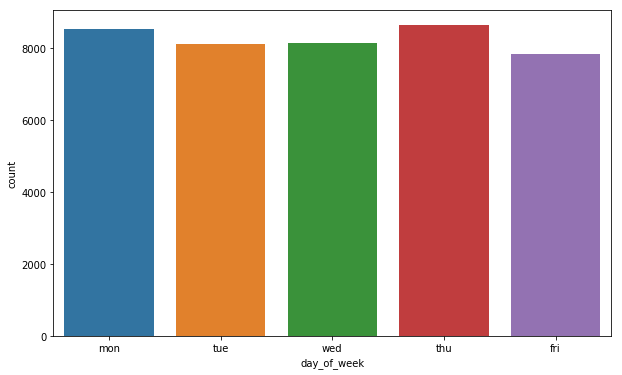

In [45]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'day_of_week')
plt.show()

There is no big difference in the above graph. The customeres have been contacted almost eqaully in a week for the compaign.

In [46]:
df_categorical['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [47]:
df_categorical['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

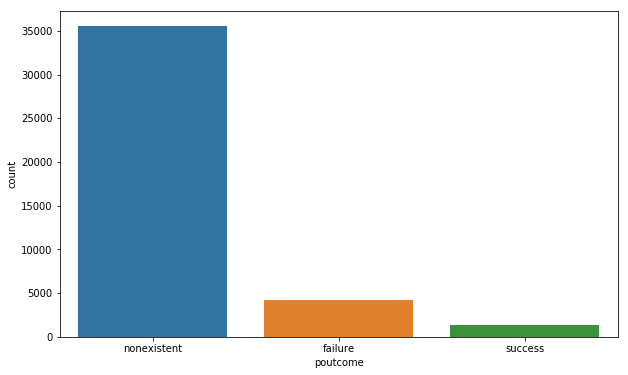

In [48]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'poutcome')
plt.show()

For the same compaign, the previous results of the attempt is mostly failure than success rate. Moreover, the nonexistent are 
high.

In [49]:
df_categorical['y'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
df_categorical['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

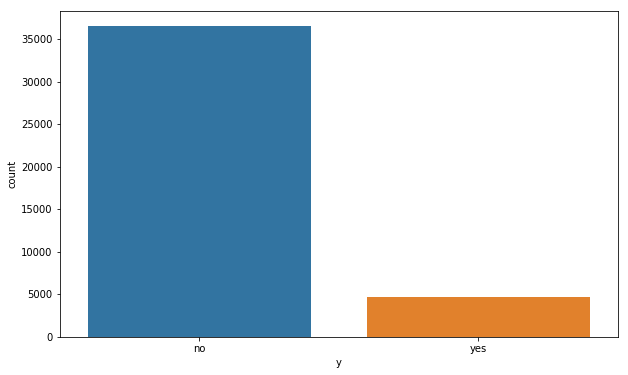

In [51]:
plt.subplots(figsize=(10,6))
sns.countplot(data = df_categorical, x = 'y')
plt.show()

The succeess rate for the compaign is very less.

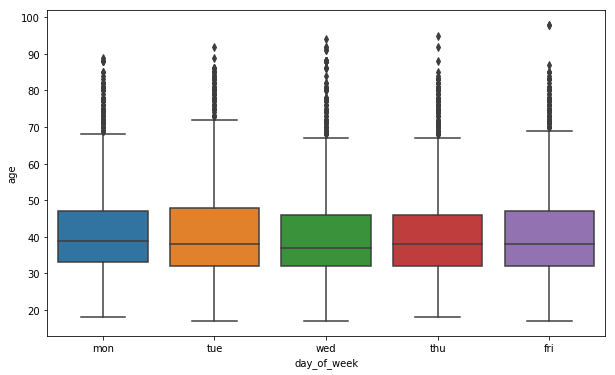

In [52]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="day_of_week",y="age",data=bankdata)
plt.show()

 The above box plot says that, the subscribed people who are in between 33-48 on an average in a week.

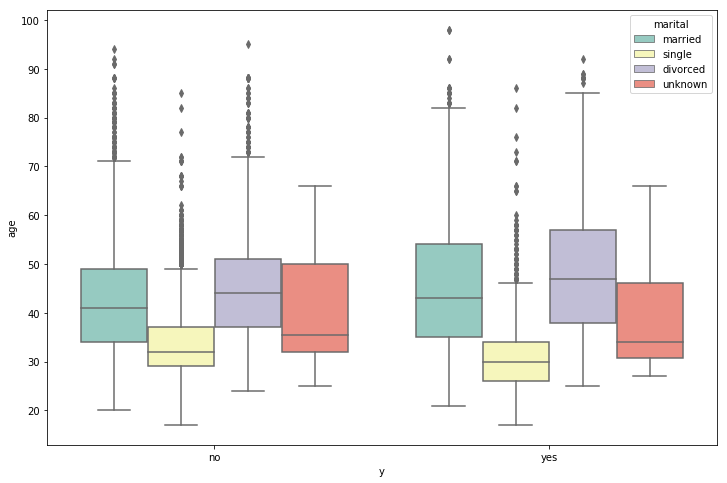

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x="y",y="age",hue="marital",data=bankdata,palette="Set3")
plt.show()

The above plot says that,

                          Married people who are in between 35-52 have subscribed.
                          
                          Unmarried people who are in between 25-35 have subscribed.
                          
                          Divorced people who are in between 38-55 have subscribed.
                          
                          Unknown category people who are in between 30-55 have subscribed.
        

In [54]:
bankdata['y'] = (bankdata['y'] == 'yes').astype(int)

In [55]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:
bankdata['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [57]:
education = pd.crosstab(bankdata['default'],bankdata['y'])

In [58]:
education

y,0,1
default,,
no,28391,4197
unknown,8154,443
yes,3,0


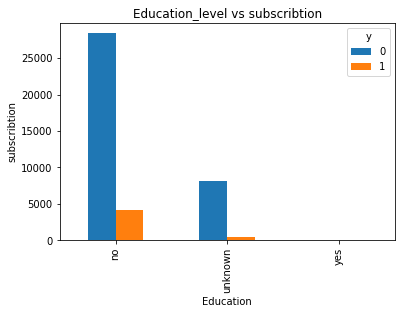

<Figure size 1440x720 with 0 Axes>

In [59]:
ax=education.plot(kind='bar')
plt.figure(figsize=(20,10))
ax.set_title('Education_level vs subscribtion')
ax.set_xlabel("Education")
ax.set_ylabel("subscribtion")
plt.show()

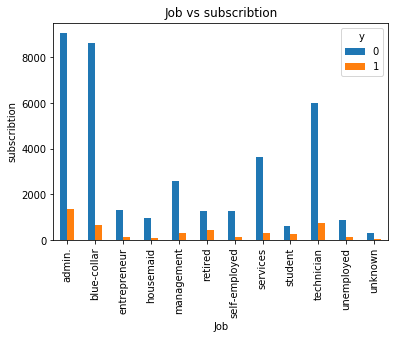

<Figure size 1440x720 with 0 Axes>

In [60]:
job = pd.crosstab(bankdata['job'],bankdata['y'])
b=job.plot(kind='bar')
plt.figure(figsize=(20,10))
b.set_title('Job vs subscribtion')
b.set_xlabel("Job")
b.set_ylabel("subscribtion")
plt.show()

## Mostly, the admin professional have subscribed for the term deposit. Moreover entrepreneur and housemaid have the lower rate of subscribtions apart from unknown status.

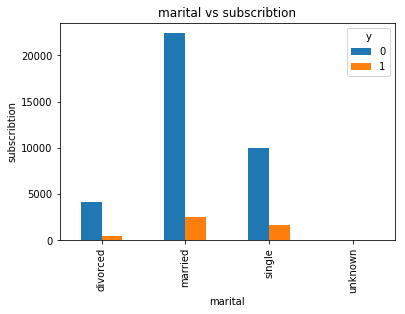

<Figure size 1440x720 with 0 Axes>

In [61]:
marital = pd.crosstab(bankdata['marital'],bankdata['y'])
c=marital.plot(kind='bar')
plt.figure(figsize=(20,10))
c.set_title('marital vs subscribtion')
c.set_xlabel("marital")
c.set_ylabel("subscribtion")
plt.show()

## From the above plot, the married people have subscribed for the compaign in the large amount and divorced people in the lower amount.

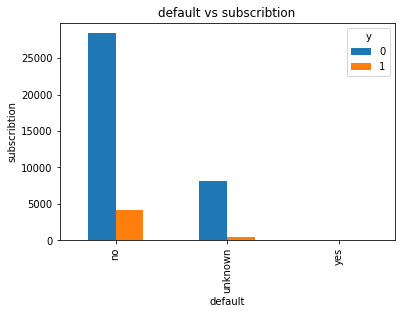

<Figure size 720x432 with 0 Axes>

In [62]:
default = pd.crosstab(bankdata['default'],bankdata['y'])
d=default.plot(kind='bar')
plt.figure(figsize=(10,6))
d.set_title('default vs subscribtion')
d.set_xlabel("default")
d.set_ylabel("subscribtion")
plt.show()

## The above plot says that, peope who have no credit in default have subscribed in the larger amount.

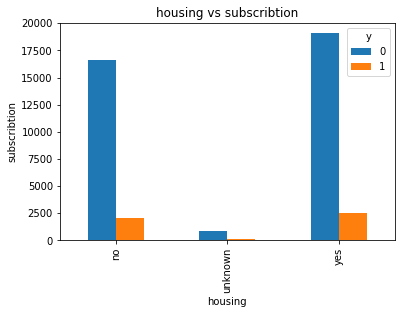

<Figure size 720x432 with 0 Axes>

In [63]:
housing = pd.crosstab(bankdata['housing'],bankdata['y'])
e=housing.plot(kind='bar')
plt.figure(figsize=(10,6))
e.set_title('housing vs subscribtion')
e.set_xlabel("housing")
e.set_ylabel("subscribtion")
plt.show()

## The above plot says that people who have the house loan have subscribed for the campaign

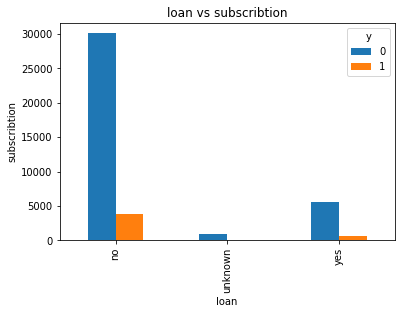

<Figure size 720x432 with 0 Axes>

In [64]:
loan = pd.crosstab(bankdata['loan'],bankdata['y'])
f=loan.plot(kind='bar')
plt.figure(figsize=(10,6))
f.set_title('loan vs subscribtion')
f.set_xlabel("loan")
f.set_ylabel("subscribtion")
plt.show()

## The above plot says that people who have personal loan have not subscribed for the campaign and who have loan, subscribed to some degree.

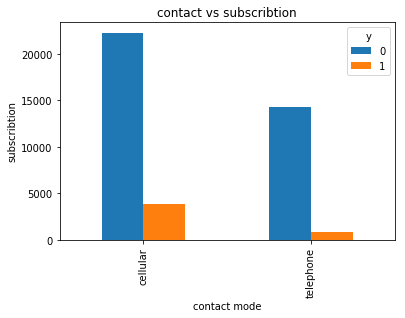

<Figure size 720x432 with 0 Axes>

In [65]:
contact = pd.crosstab(bankdata['contact'],bankdata['y'])
g=contact.plot(kind='bar')
plt.figure(figsize=(10,6))
g.set_title('contact vs subscribtion')
g.set_xlabel("contact mode")
g.set_ylabel("subscribtion")
plt.show()

## People who were contacted by cellular phone have subscribed a lot than telephone contact. 

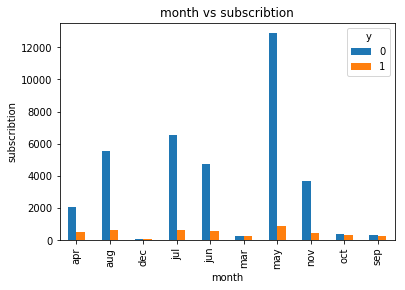

<Figure size 720x432 with 0 Axes>

In [66]:
month = pd.crosstab(bankdata['month'],bankdata['y'])
h=month.plot(kind='bar')
plt.figure(figsize=(10,6))
h.set_title('month vs subscribtion')
h.set_xlabel("month")
h.set_ylabel("subscribtion")
plt.show()

## In the month of may a large amount amount of subscribtion has happened. Whereas, during december and sep very less amount of subscribtion is there as it is a festival time.

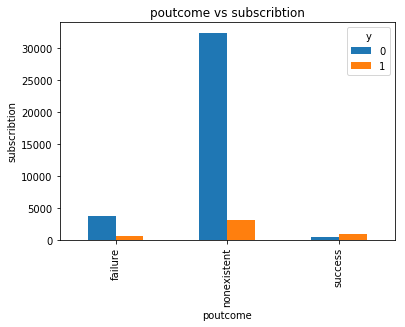

<Figure size 720x432 with 0 Axes>

In [67]:
outcome = pd.crosstab(bankdata['poutcome'],bankdata['y'])
i= outcome.plot(kind='bar')
plt.figure(figsize=(10,6))
i.set_title('poutcome vs subscribtion')
i.set_xlabel("poutcome")
i.set_ylabel("subscribtion")
plt.show()

## The above plot says that people who already were not benefitted from the compaign like this, dint not subscribe a lot.
## Whereas, who already bendefitted from compaign, have subscribed a lot than failure rate. So, those audience should be targeted for the more subscribtion.


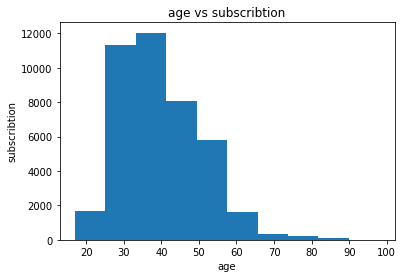

<Figure size 720x432 with 0 Axes>

In [68]:
age = bankdata['age'].plot(kind='hist')
plt.figure(figsize=(10,6))
age.set_title('age vs subscribtion')
age.set_xlabel("age")
age.set_ylabel("subscribtion")
plt.show()

The above plot says,

                        people in the range of 20-28 have less subscribtion
                         
                        People in the range of 28-42 have high subscribtion
            
                        people in the range of 42-65 have decent amount of subscribtion.
    

In [69]:
qualitative=[f for f in  bankdata.columns if bankdata[f].dtype == "object"]
quantitative=[f for f in bankdata.columns if bankdata[f].dtype!= "object"]
print(len(quantitative))
print(len(qualitative))

10
10


In [70]:
df_categorical = bankdata.select_dtypes(include=['object'])
df_categorical.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent


In [71]:
df_categorical.shape

(41188, 10)

# Outlier detection

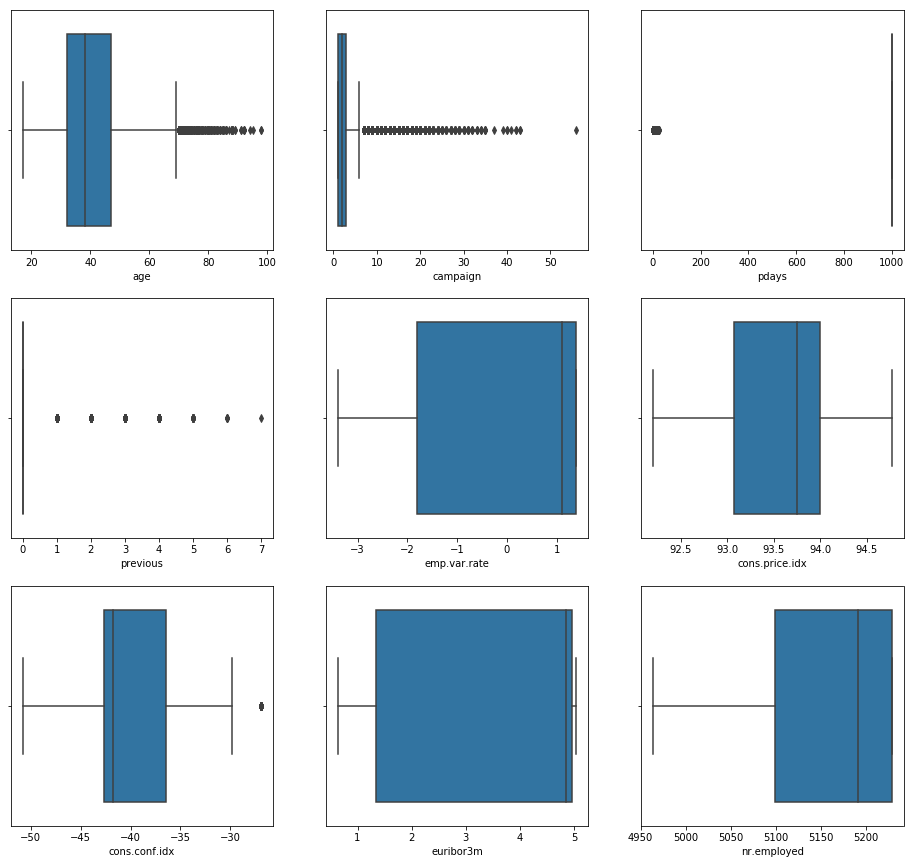

In [72]:
fig , axes = plt.subplots(3,3,figsize =(16,15))
sns.boxplot(bankdata['age'],ax = axes[0,0])
sns.boxplot(bankdata['campaign'],ax = axes[0,1])
sns.boxplot(bankdata['pdays'],ax = axes[0,2])
sns.boxplot(bankdata['previous'],ax = axes[1,0])
sns.boxplot(bankdata['emp.var.rate'],ax = axes[1,1])
sns.boxplot(bankdata['cons.price.idx'],ax = axes[1,2])
sns.boxplot(bankdata['cons.conf.idx'],ax = axes[2,0])
sns.boxplot(bankdata['euribor3m'],ax = axes[2,1])
sns.boxplot(bankdata['nr.employed'],ax = axes[2,2])
plt.show()

## There are lots of outliers have been detected. Everything should be treated to build a better model.

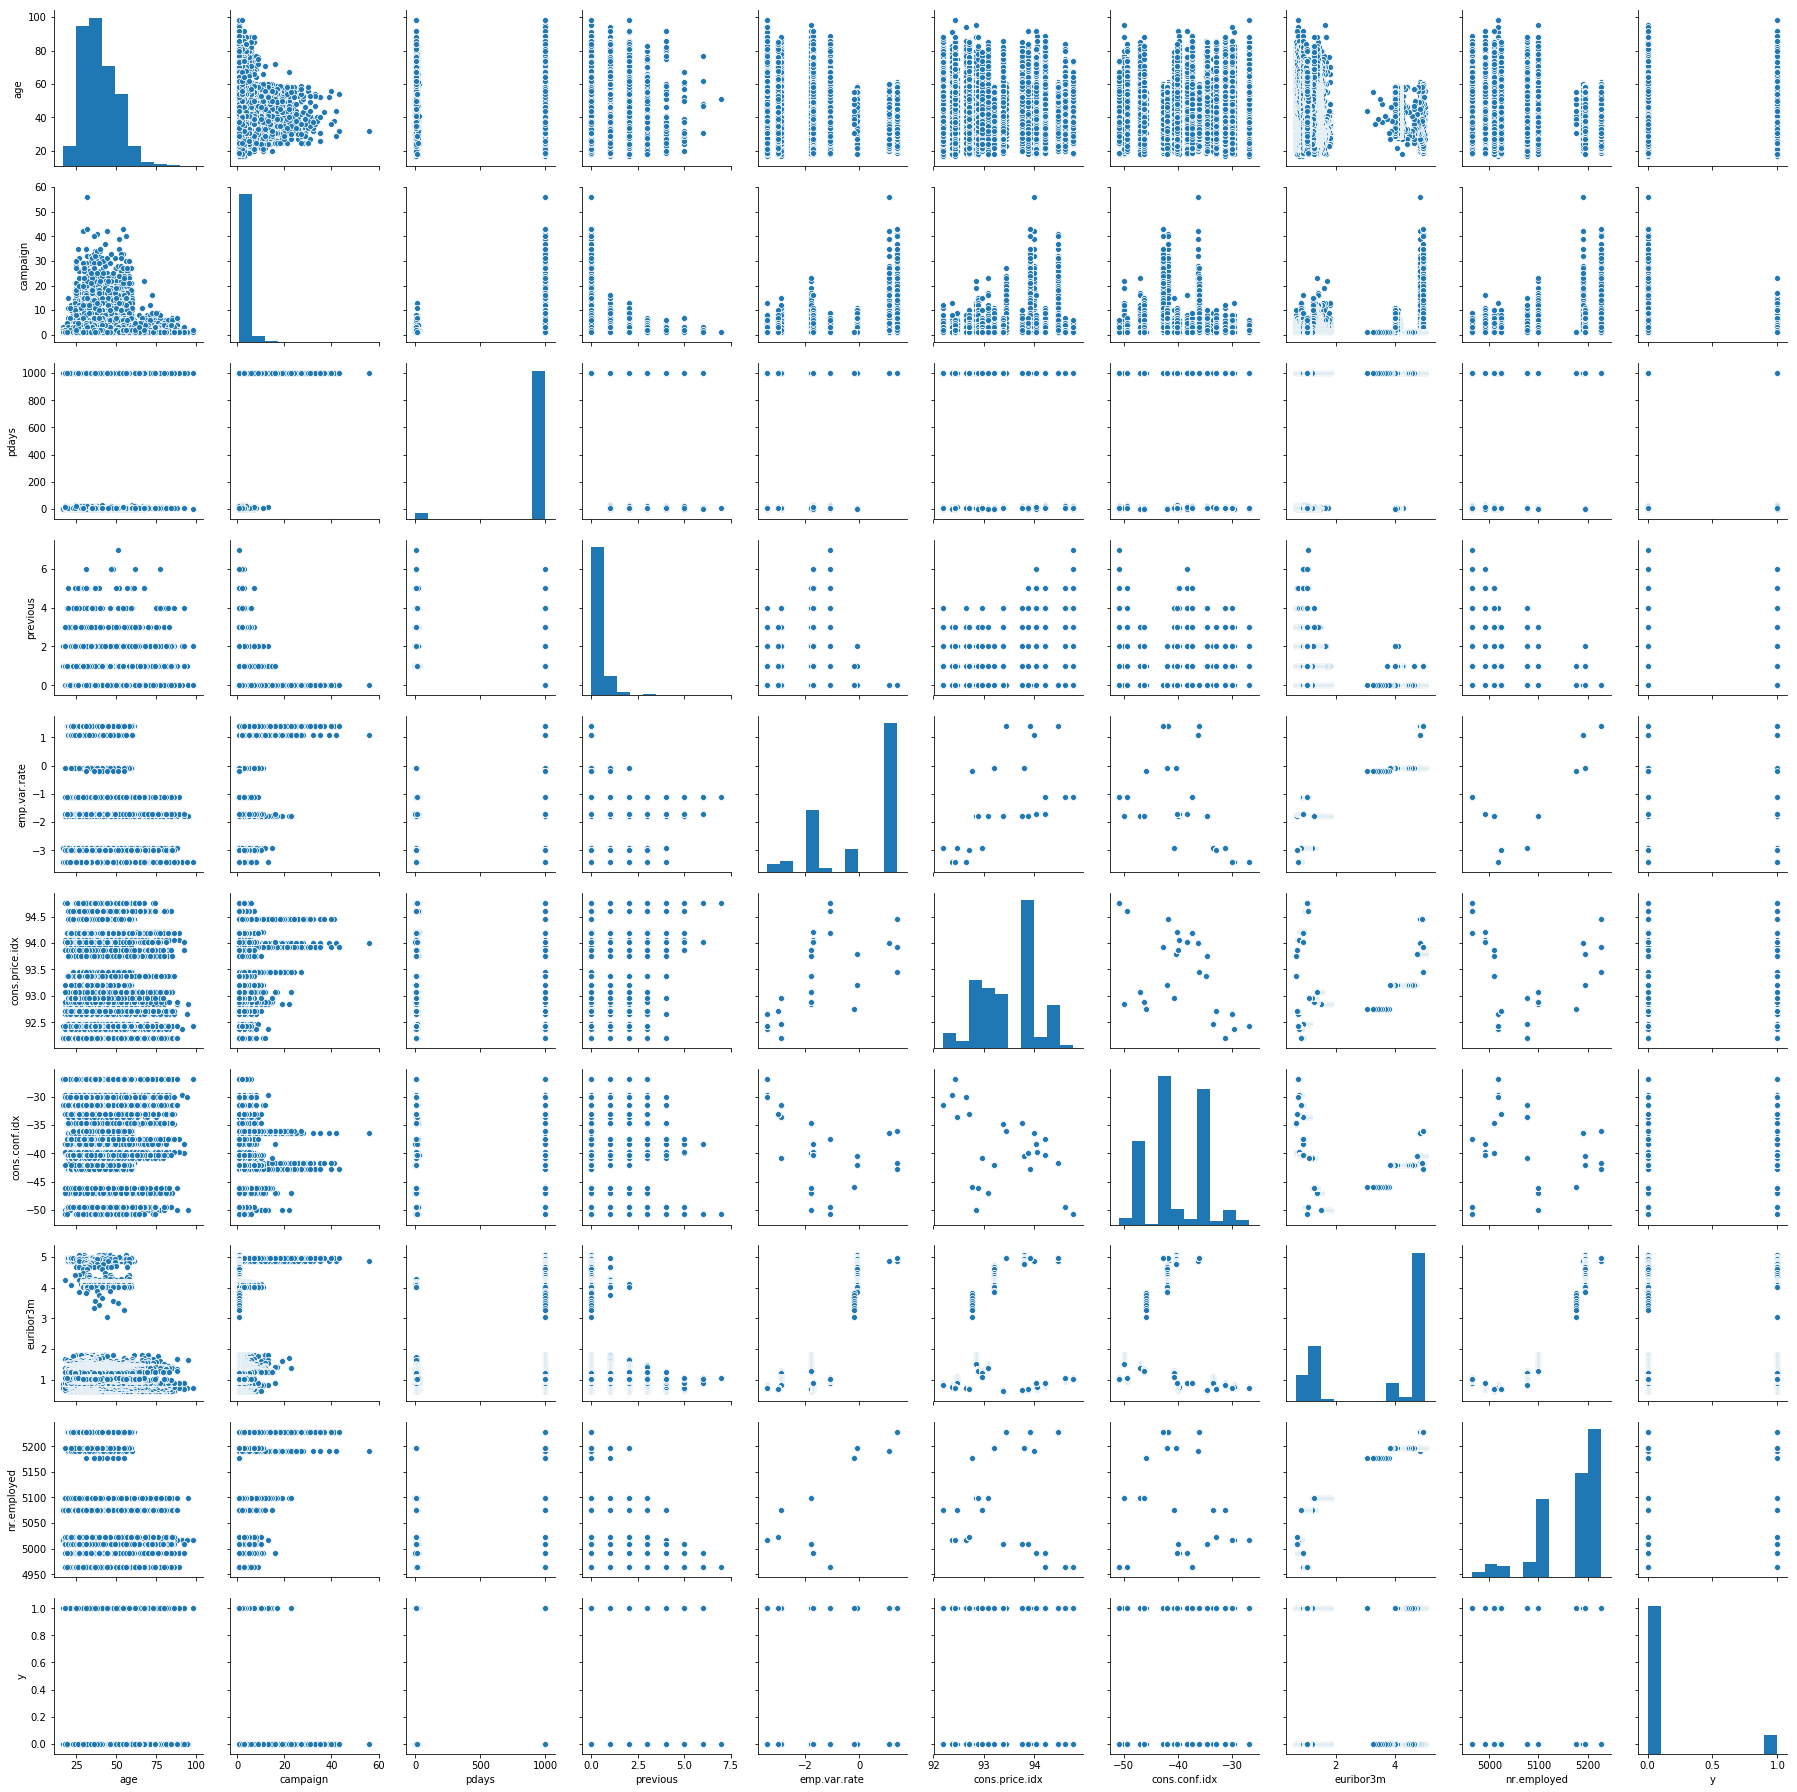

In [73]:
sns.pairplot(bankdata)
plt.show()

In [74]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Data preparation

In [75]:
dataset = bankdata.copy()

In [76]:
dataset.shape

(41188, 20)

In [77]:
# Creating a dummy variable for the variable 'job' and dropping the first one.
job = pd.get_dummies(dataset['job'],prefix='job',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,job],axis=1)

# Creating a dummy variable for the variable 'marital' and dropping the first one.
marital = pd.get_dummies(dataset['marital'],prefix='marital',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,marital],axis=1)

# Creating a dummy variable for the variable 'education' and dropping the first one.
education = pd.get_dummies(dataset['education'],prefix='education',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,education],axis=1)

# Creating a dummy variable for the variable 'default' and dropping the first one.
default = pd.get_dummies(dataset['default'],prefix='default',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,default],axis=1)

# Creating a dummy variable for the variable 'housing' and dropping the first one.
housing = pd.get_dummies(dataset['housing'],prefix='housing',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,housing],axis=1)

# Creating a dummy variable for the variable 'loan' and dropping the first one.
loan = pd.get_dummies(dataset['loan'],prefix='loan',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,loan],axis=1)

# Creating a dummy variable for the variable 'Contact' and dropping the first one.
contact = pd.get_dummies(dataset['contact'],prefix='contact',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,contact],axis=1)

# Creating a dummy variable for the variable 'Contract' and dropping the first one.
month = pd.get_dummies(dataset['month'],prefix='month',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,month],axis=1)

# Creating a dummy variable for the variable 'Contract' and dropping the first one.
day = pd.get_dummies(dataset['day_of_week'],prefix='day_of_week',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,day],axis=1)

# Creating a dummy variable for the variable 'poutcome' and dropping the first one.
outcome = pd.get_dummies(dataset['poutcome'],prefix='poutcome',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,outcome],axis=1)


# Creating a dummy variable for the variable 'y' and dropping the first one.
y = pd.get_dummies(dataset['y'],prefix='y',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,y],axis=1)

In [78]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx

In [80]:
# We have created dummies for the below variables, so we can drop them
dataset = dataset.drop(['job','marital','education','default','housing','loan','contact','month',
       'day_of_week','poutcome', 'y'], 1)

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student      

In [82]:
dataset.rename({'y_1':'y_yes'}, axis=1,inplace=True)

In [83]:
dataset['y_yes'].value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

# Model building

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

In [85]:
# Putting feature variable to X
x = dataset.drop(['y_yes'],axis=1)

# Putting response variable to y
y = dataset['y_yes']

In [86]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [87]:
#Logistic model

logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)
pred  = logistic.predict(x_test)

In [88]:
print(accuracy_score(y_test,pred)*100)

89.90855385611395


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.69      0.19      0.30      1392

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [90]:
print(f1_score(y_test,pred))

0.29587803500846976


In [91]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)
confusion_matrix

array([[10848,   117],
       [ 1130,   262]], dtype=int64)

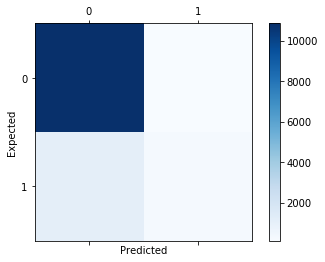

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [93]:
TP = confusion_matrix[0,0] # true positive 
TN = confusion_matrix[1,1] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [94]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.8990855385611395


In [95]:
Misclassification  = 1-accuracy
Misclassification

0.10091446143886051

In [96]:
accuracy+Misclassification

1.0

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9056603773584906

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.6912928759894459

In [99]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.3087071240105541


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.9893296853625171


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.1882183908045977


In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

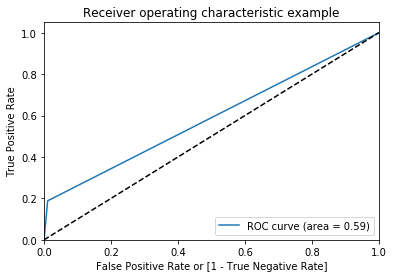

(array([0.        , 0.01067031, 1.        ]),
 array([0.        , 0.18821839, 1.        ]),
 array([2, 1, 0]))

In [103]:
draw_roc(y_test, pred)

## Decision tree model

In [104]:
tree = DecisionTreeClassifier()
model_tre = tree.fit(x_train,y_train)
pred_tree  = tree.predict(x_test)

In [105]:
print(accuracy_score(y_test,pred_tree)*100)

84.07380432143724


In [106]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10965
           1       0.31      0.33      0.32      1392

   micro avg       0.84      0.84      0.84     12357
   macro avg       0.61      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357



In [107]:
print(f1_score(y_test,pred_tree))

0.3195020746887967


In [108]:
confusion_tree = metrics.confusion_matrix(y_test,pred_tree)
confusion_tree

array([[9927, 1038],
       [ 930,  462]], dtype=int64)

In [109]:
TP_tree = confusion_tree[0,0] # true positive 
TN_tree = confusion_tree[1,1] # true negatives
FP_tree = confusion_tree[0,1] # false positives
FN_tree = confusion_tree[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our tree model
TP_tree / float(TP_tree+FN_tree)

0.9143409781707654

In [111]:
# Let us calculate specificity
TN_tree / float(TN_tree+FP_tree)

0.308

In [112]:
# Calculate false postive rate 
print(FP_tree/ float(TN_tree+FP_tree))

0.692


In [113]:
# positive predictive value 
print (TP_tree / float(TP_tree+FP_tree))

0.9053351573187415


In [114]:
# Negative predictive value
print (TN_tree / float(TN_tree+ FN_tree))

0.33189655172413796


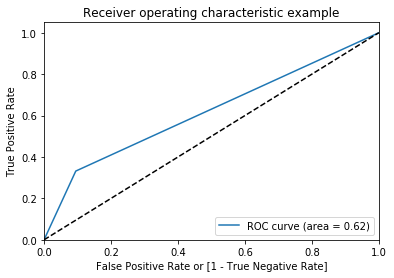

(array([0.        , 0.09466484, 1.        ]),
 array([0.        , 0.33189655, 1.        ]),
 array([2, 1, 0]))

In [115]:
draw_roc(y_test, pred_tree)

# Random forest classifier

In [116]:
random = RandomForestClassifier()
model_rf = random.fit(x_train,y_train)
pred_rf  = random.predict(x_test)

In [117]:
accuracy = accuracy_score(y_test, pred_rf)
print("Random forest accuracy : %.2f%%" % (accuracy * 100.0))

Random forest accuracy : 88.82%


In [118]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.51      0.26      0.35      1392

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



In [119]:
 print(f1_score(y_test,pred_rf))

0.3458076740881099


In [120]:
confusion_rf = metrics.confusion_matrix(y_test,pred_rf)
confusion_rf

array([[10611,   354],
       [ 1027,   365]], dtype=int64)

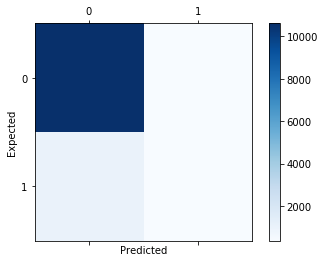

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_rf, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [122]:
TP_rf = confusion_rf[0,0] # true positive 
TN_rf = confusion_rf[1,1] # true negatives
FP_rf = confusion_rf[0,1] # false positives
FN_rf = confusion_rf[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our random forest model
TP_rf / float(TP_rf+FN_rf)

0.9117545970097954

In [124]:
# Let us calculate specificity
TN_rf / float(TN_rf+FP_rf)

0.5076495132127955

In [125]:
# Calculate false postive rate 
print(FP_rf/ float(TN_rf+FP_rf))

0.49235048678720444


In [126]:
# positive predictive value 
print (TP_rf / float(TP_rf+FP_rf))

0.9677154582763338


In [127]:
# Negative predictive value
print (TN_rf / float(TN_rf+ FN_rf))

0.26221264367816094


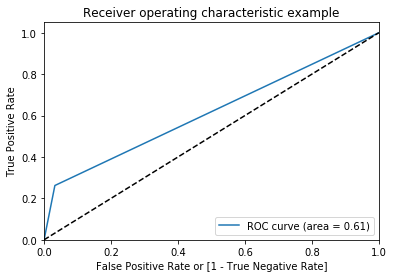

(array([0.        , 0.03228454, 1.        ]),
 array([0.        , 0.26221264, 1.        ]),
 array([2, 1, 0]))

In [128]:
draw_roc(y_test, pred_rf)

# Base models reports

## Logistic classifier
                      accuracy - 89.90855385611395
                      f1 score - 0.342646283605693
                      
## Decision tree 
                      accuracy - 83.98478595128267
                      f1 score - 0.316407599309153
        
## Random forest

                      accuracy - 88.71085214857976
                      f1 score - 0.346604215456674
        

# standardization

In [129]:
 dataset.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


In [130]:

df = dataset[['age', 'campaign', 'pdays', 'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
transformed_data = (df-df.mean())/df.std()
data_bank = dataset.drop(['age', 'campaign', 'pdays', 'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],1)
data_bank = pd.concat([data_bank,transformed_data],axis=1)

In [131]:
data_bank.head(3)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,y_yes,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,1,0,0,0,0,0,0,0,...,0,1.533016,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
1,0,0,0,0,0,0,1,0,0,0,...,0,1.628973,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676
2,0,0,0,0,0,0,1,0,0,0,...,0,-0.290182,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0.712451,0.331676


In [132]:
x_data_nosampling = data_bank.drop('y_yes',1)
y_data_nosampling = data_bank['y_yes']

In [133]:
# Splitting the data into train and test
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data_nosampling,y_data_nosampling, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [134]:
lo = LogisticRegression()
m = lo.fit(x_train_1,y_train_1)
p = lo.predict(x_test_1)

In [135]:
print(accuracy_score(y_test_1,p))

0.8994092417253379


In [136]:
print(f1_score(y_test_1,p))

0.34128245892951775


In [137]:
cmm = metrics.confusion_matrix(y_test_1,p)
cmm

array([[10792,   173],
       [ 1070,   322]], dtype=int64)

In [138]:
print(classification_report(y_test_1,p))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.65      0.23      0.34      1392

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



# Decision tree model

In [139]:
tr = DecisionTreeClassifier()
m_fit = tr.fit(x_train_1,y_train_1)
pr = tr.predict(x_test_1)

In [140]:
print(accuracy_score(y_test_1,pr))

0.8405761916322732


In [141]:
print(f1_score(y_test_1,pr))

0.3281036834924966


In [142]:
cnx = metrics.confusion_matrix(y_test_1,pr)
cnx

array([[9906, 1059],
       [ 911,  481]], dtype=int64)

In [268]:
print(classification_report(y_test_1,pr))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10965
           1       0.31      0.35      0.33      1392

   micro avg       0.84      0.84      0.84     12357
   macro avg       0.61      0.62      0.62     12357
weighted avg       0.85      0.84      0.84     12357



# Random forest model

In [143]:
r = RandomForestClassifier()
r_fit = r.fit(x_train_1,y_train_1)
r_pred = r.predict(x_test_1)

In [144]:
print(accuracy_score(y_test_1,r_pred))

0.885975560411103


In [145]:
print(f1_score(y_test_1,r_pred))

0.32744630071599046


In [146]:
crx = metrics.confusion_matrix(y_test_1,r_pred)
crx

array([[10605,   360],
       [ 1049,   343]], dtype=int64)

In [269]:
print(classification_report(y_test_1,r_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.49      0.25      0.33      1392

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.70      0.61      0.63     12357
weighted avg       0.86      0.89      0.87     12357



# Basic logitstic model tuning

In [147]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(x_train_1, y_train_1)

print(model_lr.best_estimator_)
print(model_lr.score(x_train_1, y_train_1)) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.34778660612939843


In [148]:
lr= LogisticRegression(C=1, penalty='l2')
m_1 = lr.fit(x_train_1, y_train_1)
f_1 = lr.predict(x_test_1)

In [149]:
print(accuracy_score(y_test_1,f_1))

0.8994092417253379


In [150]:
print(f1_score(y_test_1,f_1))

0.34128245892951775


In [151]:
conf_tuning = metrics.confusion_matrix(y_test_1,f_1)
conf_tuning

array([[10792,   173],
       [ 1070,   322]], dtype=int64)

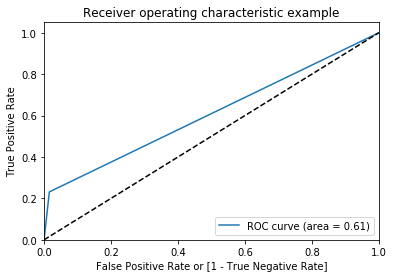

(array([0.        , 0.01577747, 1.        ]),
 array([0.        , 0.23132184, 1.        ]),
 array([2, 1, 0]))

In [152]:
draw_roc(y_test_1,f_1)

In [153]:
data_bank.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes',
       'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.emplo

In [154]:
data_bank.shape

(41188, 53)

# statistical tests

In [155]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [156]:
# Logistic regression model
logm1 = sm.GLM(y_train_1,(sm.add_constant(x_train_1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28779
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 21 Apr 2019   Deviance:                          nan
Time:                        22:50:08   Pearson chi2:                 3.70e+19
No. Iterations:                   100   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.563e+14   3.74e+06  -9.53e+07      0.000   -3.56e+14   -3.56e+14
job_blue-collar               -3.081e+13   1.47e+06  -2.09e+07      0.000   -3.08e+13   -3.08e+13
job_entrepreneur               5.392e+12   2.26e+06   2.39e+06      0.000    5.39e+12    5.39e+12
job_housemaid                  -2.37e+13    2.7e+06  -8.76e+06      0.000   -2.37e+13   -2.37e+13
job_management                 1.094e+13   1.73e+06   6.34e+06      0.000    1.09e+13    1.09e+13
job_retired                    9.147e+13   2.45e+06   3.74e+07      0.000    9.15e+13    9.15e+13
job_self-employed               1.72e+13   2.31e+06   7.45e+06      0.000    1.72e+13    1.72e+13
job_services                  -4.593e+13    1.6e+06  -2.87e+07      0.000   -4.59e+13   -4.59e+13
job_student                    6.953e+13   3.01e+06   2.31e+07      0.000    6.95e+13    6.95e+13
job_technician                -7.905e+13   1.41e+06  -5.59e+07      0.000   -7.91e+13   -7.91e+13
job_unemployed                 3.677e+12    2.7e+06   1.36e+06      0.000    3.68e+12    3.68e+12
job_unknown                   -2.467e+14   4.65e+06   -5.3e+07      0.000   -2.47e+14   -2.47e+14
marital_married                1.554e+13   1.31e+06   1.19e+07      0.000    1.55e+13    1.55e+13
marital_single                 4.458e+13    1.5e+06   2.96e+07      0.000    4.46e+13    4.46e+13
marital_unknown                 2.77e+14   9.69e+06   2.86e+07      0.000    2.77e+14    2.77e+14
education_basic.6y             7.331e+13   2.12e+06   3.46e+07      0.000    7.33e+13    7.33e+13
education_basic.9y             2.094e+13   1.69e+06   1.24e+07      0.000    2.09e+13    2.09e+13
education_high.school          3.649e+13   1.75e+06   2.09e+07      0.000    3.65e+13    3.65e+13
education_illiterate          -9.316e+14    1.8e+07  -5.18e+07      0.000   -9.32e+14   -9.32e+14
education_professional.course  1.984e+13   1.97e+06   1.01e+07      0.000    1.98e+13    1.98e+13
education_university.degree    4.112e+13   1.79e+06    2.3e+07      0.000    4.11e+13    4.11e+13
education_unknown              7.466e+13   2.38e+06   3.14e+07      0.000    7.47e+13    7.47e+13
default_unknown                -2.02e+14   1.05e+06  -1.93e+08      0.000   -2.02e+14   -2.02e+14
default_yes                   -3.986e+15   3.88e+07  -1.03e+08      0.000   -3.99e+15   -3.99e+15
housing_unknown               -2.321e+13   1.29e+06  -1.79e+07      0.000   -2.32e+13   -2.32e+13
housing_yes                     -4.5e+13   8.08e+05  -5.57e+07      0.000    -4.5e+13    -4.5e+13
loan_unknown                  -2.321e+13   1.29e+06  -1.79e+07      0.000   -2.32e+13   -2.32e+13
loan_yes                      -3.263e+13   1.11e+06  -2.94e+07      0.000   -3.26e+13   -3.26e+13
contact_telephone             -5.765e+14   1.56e+06  -3.69e+08      0.000   -5.77e+14   -5.77e+14
month_aug                 

In [157]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(x_data_nosampling,y_data_nosampling)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
 False False False False False  True False False False  True False False
 False False False  True  True  True False  True  True  True  True False
 False  True False False False  True  True False False False False  True
  True False  True False]
[ 6 19 14 21  3 22  8  2 34 33  9 29 26  4 16 25 36  1 35 17 18  1 10 20
 31 30 32  1  1  1 27  1  1  1  1 37 11  1 23 24 15  1  1 38 13  5 28  1
  1 12  1  7]


In [158]:
x_data_nosampling.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'age',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
  

In [159]:
new = x_data_nosampling[['education_illiterate','default_unknown','contact_telephone', 'month_aug', 'month_dec'
                        ,'month_jun', 'month_mar', 'month_may', 'month_nov','day_of_week_mon','poutcome_nonexistent',
                         'poutcome_success','emp.var.rate','cons.price.idx','euribor3m']]

In [160]:
logm4 = sm.GLM(y_data_nosampling,(sm.add_constant(new)), family = sm.families.Binomial())
model4 = logm4.fit()

In [161]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Generalized linear model
=====================================================================
Model:                GLM               AIC:             22881.9749  
Link Function:        logit             BIC:             -414639.6718
Dependent Variable:   y_yes             Log-Likelihood:  -11425.     
Date:                 2019-04-21 22:50  LL-Null:         -14499.     
No. Observations:     41188             Deviance:        22850.      
Df Model:             15                Pearson chi2:    4.13e+04    
Df Residuals:         41172             Scale:           1.0000      
Method:               IRLS                                           
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -2.3650   0.0612 -38.6449 0.0000 -2.4849 -2.2450
education_illiterate  0.8430   0.6333   1.3312 0.1831 -0.3981  2.0842
default_unknown      -0.2788   0.0556  -5.0107 0.0000 -0.3879 -0.1698
contact_telephone    -0.6769   0.0588 -11.5033 0.0000 -0.7922 -0.5616
month_aug             0.5799   0.0648   8.9526 0.0000  0.4529  0.7069
month_dec             0.4065   0.1666   2.4402 0.0147  0.0800  0.7330
month_jun            -0.6305   0.0695  -9.0690 0.0000 -0.7668 -0.4942
month_mar             1.3794   0.0993  13.8973 0.0000  1.1848  1.5739
month_may            -0.5060   0.0533  -9.4854 0.0000 -0.6105 -0.4014
month_nov            -0.5981   0.0715  -8.3690 0.0000 -0.7381 -0.4580
day_of_week_mon      -0.3034   0.0451  -6.7248 0.0000 -0.3918 -0.2150
poutcome_nonexistent  0.4434   0.0546   8.1223 0.0000  0.3364  0.5504
poutcome_success      1.8070   0.0774  23.3422 0.0000  1.6553  1.9587
emp.var.rate         -2.4404   0.1262 -19.3408 0.0000 -2.6877 -2.1931
cons.price.idx        1.0376   0.0478  21.6874 0.0000  0.9438  1.1314
euribor3m             1.0127   0.1053   9.6210 0.0000  0.8064  1.2190
=====================================================================

"""

In [162]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [163]:
vif_cal(new,y_data_nosampling)

,Var,Vif
12,emp.var.rate,74.45
14,euribor3m,49.15
13,cons.price.idx,11.30
4,month_dec,1.05
0,education_illiterate,1.00
5,month_jun,0.08
11,poutcome_success,0.08
6,month_mar,0.07
2,contact_telephone,0.06
7,month_may,0.05


Variance influence factors are not correlated with each other mostly.

In [164]:
new.drop('education_illiterate',axis=1,inplace=True)

In [165]:
new.columns

Index(['default_unknown', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon',
       'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

# Model building after standardization

In [166]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new, y_data_nosampling, test_size=0.20, stratify = y_data_nosampling, random_state = 99)

In [167]:
log_final = LogisticRegression()
log_final.fit(x_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [168]:
y_pred_new = log_final.predict(x_test_new)

In [169]:
print(accuracy_score(y_test_new,y_pred_new))

0.8997329448895363


In [170]:
print(f1_score(y_test_new,y_pred_new))

0.32405891980360063


In [171]:
cl = metrics.confusion_matrix(y_test_new,y_pred_new)
cl

array([[7214,   96],
       [ 730,  198]], dtype=int64)

In [172]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(new, y_data_nosampling)

print(model_lr.best_estimator_)
print(model_lr.score(new, y_data_nosampling))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.33474300585556277


In [173]:
lr_final= LogisticRegression(C=100, penalty='l2')
lr_final.fit(x_train_new,y_train_new)
n = lr_final.predict(x_test_new)

In [174]:
print(f1_score(y_test_new,n))

0.32682926829268294


In [175]:
c_final_log = metrics.confusion_matrix(y_test_new,n)
c_final_log

array([[7209,  101],
       [ 727,  201]], dtype=int64)

In [176]:
weights = np.linspace(0.05, 0.95, 20)
tuned_parameters = {'class_weight':  [{0: x, 1: 1.0-x} for x in weights]}

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(new, y_data_nosampling)

print(model_lr.best_estimator_)
print(model_lr.score(new, y_data_nosampling))

LogisticRegression(C=1.0,
          class_weight={0: 0.381578947368421, 1: 0.618421052631579},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)
0.4132959551461754


In [177]:
lr_final_output= LogisticRegression(C=1.0, penalty='l2',class_weight={0: 0.381578947368421, 1: 0.618421052631579})
lr_final_output.fit(x_train_new,y_train_new)
n_output = lr_final_output.predict(x_test_new)

In [178]:
print(f1_score(y_test_new,n_output))

0.41804910418049107


In [179]:
confusion_final = metrics.confusion_matrix(y_test_new,n_output)
confusion_final

array([[7046,  264],
       [ 613,  315]], dtype=int64)

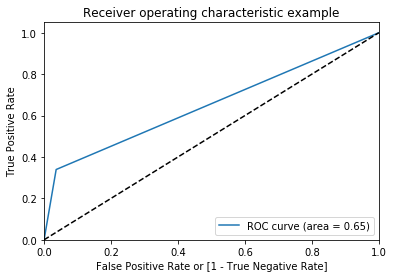

(array([0.        , 0.03611491, 1.        ]),
 array([0.        , 0.33943966, 1.        ]),
 array([2, 1, 0]))

In [180]:
draw_roc(y_test_new,n_output)

# Decision tree base model (after standardization)

In [181]:
tree_final = DecisionTreeClassifier()
tree_final.fit(x_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [182]:
tree_final = tree_final.predict(x_test_new)

In [183]:
print(f1_score(y_test_new,tree_final))

0.3475609756097561


In [184]:
tree_cx = metrics.confusion_matrix(y_test_new,tree_final)
tree_cx

array([[7154,  156],
       [ 700,  228]], dtype=int64)

# sample of subscribers

In [185]:
subscribers = len(dataset[dataset['y_yes'] == 1])
subscribers

4640

# Indices of non-subscribers

In [186]:
non_subscribers_indices = dataset[dataset.y_yes == 0].index
non_subscribers_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41170, 41175, 41176, 41177, 41179, 41180, 41182, 41184, 41185,
            41187],
           dtype='int64', length=36548)

# Random sample non subscribers indices

In [187]:
random_indices = np.random.choice(non_subscribers_indices,subscribers, replace=False)

In [188]:
random_indices

array([17799, 19721, 17531, ...,  1504, 29221, 31226], dtype=int64)

#  Find the indices of subscribers

In [189]:
subscribers_index = dataset[dataset.y_yes == 1].index

# Concat subscribers and non subscribers

In [190]:
under_sample_indices = np.concatenate([subscribers_index,random_indices])

# Get Balance Dataframe

In [191]:
under_sample = dataset.loc[under_sample_indices]

In [192]:
under_sample.shape

(9280, 53)

In [193]:
under_sample.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
75,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,1,0,1
83,49,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,1
88,49,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,1
129,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,1
139,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,1,0,1


In [194]:
under_sample['campaign'].value_counts()

1     4263
2     2410
3     1161
4      540
5      328
6      178
7      106
8       66
9       50
10      40
11      33
12      25
13      17
14      13
16       8
17       8
15       6
24       5
21       4
19       4
23       3
35       2
18       2
20       2
34       1
28       1
56       1
29       1
22       1
31       1
Name: campaign, dtype: int64

In [195]:
under_sample.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_

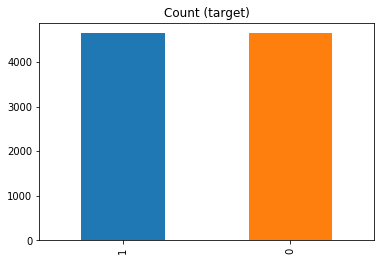

In [196]:
under_sample.y_yes.value_counts().plot(kind='bar', title='Count (target)');

In [197]:
under_sample.y_yes.value_counts()

1    4640
0    4640
Name: y_yes, dtype: int64

# Model building

In [198]:
X_under = under_sample.loc[:,under_sample.columns != 'y_yes']
y_under = under_sample.loc[:,under_sample.columns == 'y_yes']

In [199]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)


In [200]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

In [201]:
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.6310122038765255
0.7431752873563219


In [202]:
confusion_undersampling = metrics.confusion_matrix(y_under_test,y_under_pred)
confusion_undersampling

array([[1190,  201],
       [ 514,  879]], dtype=int64)

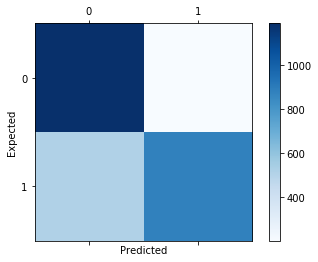

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_undersampling, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [204]:
print(classification_report(y_under_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1391
           1       0.81      0.63      0.71      1393

   micro avg       0.74      0.74      0.74      2784
   macro avg       0.76      0.74      0.74      2784
weighted avg       0.76      0.74      0.74      2784



In [205]:
print(f1_score(y_under_test,y_under_pred)*100)

71.08774767488882


# Model tuning

In [206]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(X_under, y_under)

print(model_lr.best_estimator_)
print(model_lr.score(X_under, y_under))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.7076591154261057


In [207]:
lr= LogisticRegression(C=0.01, penalty='l2')
m = lr.fit(X_under, y_under)
f = lr.predict(X_under_test)

In [208]:
print(accuracy_score(y_under_test,f))

0.7406609195402298


In [209]:
print(f1_score(y_under_test,f)*100)

71.28082736674622


In [210]:
confusion_undersamp = metrics.confusion_matrix(y_under_test,f)
confusion_undersamp

array([[1166,  225],
       [ 497,  896]], dtype=int64)

In [211]:
print(classification_report(y_under_test,f))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1391
           1       0.80      0.64      0.71      1393

   micro avg       0.74      0.74      0.74      2784
   macro avg       0.75      0.74      0.74      2784
weighted avg       0.75      0.74      0.74      2784



# standartization

In [212]:

df = under_sample[['age', 'campaign', 'pdays', 'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
transformed_data = (df-df.mean())/df.std()
data = under_sample.drop(['age', 'campaign', 'pdays', 'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],1)
data = pd.concat([data,transformed_data],axis=1)

In [213]:
data.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,y_yes,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
75,1,0,0,0,0,0,0,0,0,0,...,1,0.043588,-0.563245,0.355051,-0.447967,0.924135,0.813463,0.717015,1.001003,0.636275
83,0,1,0,0,0,0,0,0,0,0,...,1,0.710105,-0.563245,0.355051,-0.447967,0.924135,0.813463,0.717015,1.001003,0.636275
88,0,0,0,0,0,0,0,0,1,0,...,1,0.710105,-0.563245,0.355051,-0.447967,0.924135,0.813463,0.717015,1.001003,0.636275
129,0,0,0,0,0,0,0,0,1,0,...,1,0.043588,-0.563245,0.355051,-0.447967,0.924135,0.813463,0.717015,1.001003,0.636275
139,1,0,0,0,0,0,0,0,0,0,...,1,0.376846,-0.563245,0.355051,-0.447967,0.924135,0.813463,0.717015,1.001003,0.636275


In [214]:
x_data = under_sample.drop('y_yes',1)
y_data = under_sample['y_yes']

In [215]:
Base_log = LogisticRegression()
Base_log.fit(x_data,y_data)
predictio = Base_log.predict(X_under_test)

In [216]:
print(accuracy_score(y_under_test,predictio))

0.7446120689655172


In [217]:
print(f1_score(y_under_test,predictio)*100)

71.41133896260554


In [218]:
cfx = metrics.confusion_matrix(y_under_test,predictio)
cfx

array([[1185,  206],
       [ 505,  888]], dtype=int64)

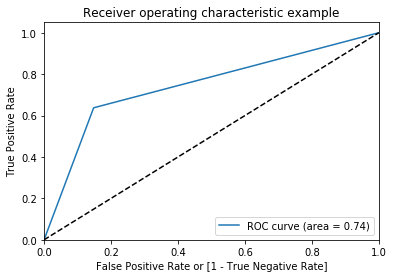

(array([0.       , 0.1480949, 1.       ]),
 array([0.        , 0.63747308, 1.        ]),
 array([2, 1, 0]))

In [219]:
draw_roc(y_under_test,predictio)

# Decision tree (random under sampled)

In [220]:
dec = DecisionTreeClassifier()
dec.fit(X_under_train,y_under_train)
y_dec_pred = dec.predict(X_under_test)

In [221]:
print(accuracy_score(y_under_test,y_dec_pred)*100)

63.93678160919541


In [222]:
confusion_tree = metrics.confusion_matrix(y_under_test,y_dec_pred)
confusion_tree

array([[894, 497],
       [507, 886]], dtype=int64)

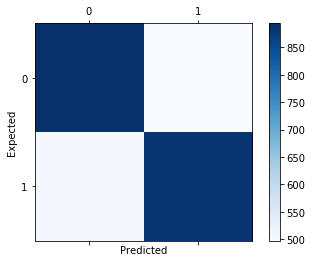

In [223]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_tree, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [224]:
print(f1_score(y_under_test,y_dec_pred))

0.6383285302593661


In [225]:
print(recall_score(y_under_test,y_dec_pred))

0.6360373295046662


In [226]:
print(classification_report(y_under_test,y_dec_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1391
           1       0.64      0.64      0.64      1393

   micro avg       0.64      0.64      0.64      2784
   macro avg       0.64      0.64      0.64      2784
weighted avg       0.64      0.64      0.64      2784



#### optimization

In [227]:
# tree parameter
# Defining Tree Parameters For Grid Based Search:: For More Details Refer to Scikit Learn Documentation.
tree_param = {
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":[3,4,5,6],
    "max_features":["auto","sqrt","log2"],
    "random_state": [123]
}

In [228]:
# Applying the Grid Search Algorithm
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, tree_param, cv = 5)

In [229]:
grid

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [230]:
best_prams = grid.fit(X_under_train,y_under_train)

In [231]:
best_prams.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'random'}

In [232]:
tree_bestparams = DecisionTreeClassifier(criterion='entropy',
 max_depth= 6,
 max_features= 'auto',
 random_state= 123,
 splitter= 'random')

In [233]:
model_tree = tree_bestparams.fit(X_under_train,y_under_train) # Fitting the Learner on Train Dataset.
pred_TREE = tree_bestparams.predict(X_under_test) # Making Predictions
accuracy_score(y_under_test, pred_TREE) # Calculating Accuracy

0.728448275862069

In [234]:
print(f1_score(y_under_test,pred_TREE)*100)

68.91447368421052


In [235]:
new_confusionm = metrics.confusion_matrix(y_under_test,pred_TREE)
new_confusionm

array([[1190,  201],
       [ 555,  838]], dtype=int64)

In [236]:
print(recall_score(y_under_test,pred_TREE)*100)

60.157932519741564


In [237]:
print(precision_score(y_under_test,pred_TREE)*100)

80.65447545717036


In [238]:
final_treee=metrics.confusion_matrix(y_under_test,pred_TREE)
final_treee

array([[1190,  201],
       [ 555,  838]], dtype=int64)

# Random forest model (random under sampled)

In [239]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_under_train,y_under_train)
y_rf_pred = rfmodel.predict(X_under_test)

In [240]:
print(accuracy_score(y_under_test,y_rf_pred)*100)

71.80316091954023


In [241]:
confusion_rf = metrics.confusion_matrix(y_under_test,y_rf_pred)
confusion_rf

array([[1104,  287],
       [ 498,  895]], dtype=int64)

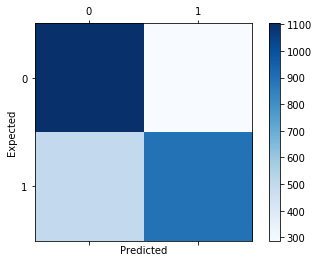

In [242]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_rf, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [243]:
print(f1_score(y_under_test,y_rf_pred)*100)

69.51456310679612


In [244]:
print(recall_score(y_under_test,y_rf_pred))

0.6424982053122756


In [245]:
print(classification_report(y_under_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1391
           1       0.76      0.64      0.70      1393

   micro avg       0.72      0.72      0.72      2784
   macro avg       0.72      0.72      0.72      2784
weighted avg       0.72      0.72      0.72      2784



# Optimization

In [246]:
rf = RandomForestClassifier()

In [247]:
# Parameter Tuning using Grid Search - Random Forest
rf_param = {
     "criterion":["gini", "entropy"],
    "max_depth":[4,5,6,7,8],
    "max_features":["auto", "sqrt","log2"],
    "bootstrap":[True,False]
}

In [248]:
grid_srch = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5)

In [249]:
cv_grid = grid_srch.fit(X_under_train,y_under_train)

In [250]:
grid_srch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt'}

In [251]:
rf_bestparams = RandomForestClassifier(criterion='entropy',
 max_depth= 8,
 max_features= 'log2',
 random_state= 123,
 bootstrap= True)

In [252]:
model_rforest = rf_bestparams.fit(X_under_train,y_under_train) # Fitting the Learner on Train Dataset.
pred_rforest = rf_bestparams.predict(X_under_test) # Making Predictions
print(f1_score(y_under_test, pred_rforest)*100) # Calculating Accuracy

72.87607170693687


In [253]:
# precision and recall scores
print('precision score is',precision_score(y_under_test,pred_rforest)*100)
print('Recall score is',recall_score(y_under_test,pred_rforest)*100)

precision score is 79.71014492753623
Recall score is 67.12132089016511


In [254]:
final_rf=metrics.confusion_matrix(y_under_test,pred_rforest)
final_rf

array([[1153,  238],
       [ 458,  935]], dtype=int64)

# XGBoosting

In [255]:
# Apply XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=123)

In [256]:
model_xg = xg.fit(X_under_train,y_under_train)
pred_xg  = xg.predict(X_under_test)

In [257]:
print(f1_score(y_under_test,pred_xg)*100)

72.16494845360826


In [258]:
# precision score
print(precision_score(y_under_test,pred_xg)*100)

80.60230292294067


In [259]:
#Recall score
print(recall_score(y_under_test,pred_xg)*100)

65.32663316582915


### Parameter optimization

In [260]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.02], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [7],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.5],
              'n_estimators': [50,100], #number of trees
              'seed': [1337],
              'missing': [9999999999]}

In [261]:
grid_srch_xgb = GridSearchCV(estimator=xg, param_grid=parameters, cv=5)

In [262]:
cv_grid_xg = grid_srch_xgb.fit(X_under_train,y_under_train)

In [263]:
grid_srch_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.02,
 'max_depth': 6,
 'min_child_weight': 7,
 'missing': 9999999999,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [264]:
xg_bestparams = XGBClassifier(colsample_bytree=0.5,
 learning_rate= 0.02,
 max_depth= 6,
 min_child_weight= 7,
 missing=9999999999,
 n_estimators=100,
 nthread= 4,
 objective='binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.8)

In [265]:
model_xgboost = xg_bestparams.fit(X_under_train,y_under_train) # Fitting the Learner on Train Dataset.
pred_xgboost = xg_bestparams.predict(X_under_test) # Making Predictions
print(f1_score(y_under_test, pred_xgboost)*100) # Calculating Accuracy

72.53184713375795


In [270]:
# precision and recall scores
print('precision score is',precision_score(y_under_test,pred_xgboost)*100)
print('Recall score is',recall_score(y_under_test,pred_xgboost)*100)

precision score is 81.41197497765862
Recall score is 65.39842067480258


In [267]:
final_xgb=metrics.confusion_matrix(y_under_test,pred_xgboost)
final_xgb

array([[1183,  208],
       [ 482,  911]], dtype=int64)

# Summary after applying the random under sampling technique

## Logistic classifier
                      accuracy - 75.07183908045977
                      f1 score - 0.7190283400809717
                      
## Decision tree 
                      accuracy - 63.54166666666666
                      f1 score - 0.6344976593446165
        
## Random forest

                      accuracy - 73.09626436781609
                      f1 score - 0.7082197117257498